# Figure 1c/1f

In [76]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import phate
import proplot as pplt
import matplotlib
import matplotlib.colors as mcolors
import scprep
import scipy
import seaborn
from scipy.stats import pearsonr
from scipy.stats import zscore
from sklearn.decomposition import PCA

pd. set_option('display.max_columns', 60)
pd. set_option('display.max_rows', 100) 

In [2]:
#Generation of PCA in Figure 1c
all_data = pd.read_csv('/....../df_gd_all.txt', sep='\t')
all_data.head()

/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: DtypeWarning: Columns (51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,DNA_1,DNA_2,194_Cisplatin,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
0,2.112668,1.072871,1.784029,36.151936,0.732375,0.000000,1.565820,2.242769,0.000000,0.000000,3.449325,15.808734,7.545413,0.484244,1.622991,13.585954,23.493839,10.253730,3.051339,61.927704,6.037919,5.555997,17.510517,3.120044,172.314102,23.197765,0.234269,0.000000,2.445910,33.498081,0.940899,5.350353,7.302702,132.305099,21.675066,0.106663,40.808945,2.020658,2.162645,13.745032,2.528904,2.067870,16.492302,0.000000,7.492941,0.809636,1188.507935,2177.531006,21.608774,5.084100,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
1,0.527830,0.000000,0.000000,40.617779,0.000000,0.850179,0.000000,2.896378,1.821622,0.000000,0.000000,12.363726,94.904320,10.781694,12.443624,60.355770,53.698391,51.307049,1.147771,60.007214,5.578413,22.690882,12.429095,0.000000,249.278717,40.863148,4.385691,0.430424,2.954062,42.227524,2.573740,2.424393,11.418387,211.959457,31.795179,2.262900,14.396840,0.000000,9.581733,2.549168,0.764066,0.512237,10.084972,0.000000,11.921869,0.973840,1148.690063,2135.051025,11.153146,0.000000,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
2,0.000000,0.272097,1.360897,12.533136,0.000000,0.000000,0.000000,2.684406,4.605258,0.000000,0.000000,69.111595,78.055313,0.000000,0.000000,3.013540,54.984116,12.758614,0.905969,0.000000,1.819490,0.000000,5.411917,0.000000,234.678146,9.723784,3.305206,6.483822,4.072320,28.807552,0.386954,2.221904,0.000000,16.533901,83.216873,0.000000,8.262188,1.027620,1.759348,9.905869,0.000000,0.000000,12.013611,12.136374,11.801295,1.850765,1070.468506,1976.926392,16.781635,0.542236,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
3,0.000000,0.052713,0.000000,33.661613,0.000000,0.317290,0.000000,0.166774,1.022511,0.857797,0.000000,12.005932,38.411808,2.619150,0.174478,8.227551,28.066032,20.863403,0.000000,44.467892,0.809206,9.240581,15.271775,1.525572,168.543442,33.865623,0.000000,7.686261,0.000000,38.135387,0.000000,2.225263,0.888110,123.516968,17.426126,0.572136,25.417891,0.000000,2.044804,3.667158,2.677844,0.610078,24.022224,3.468787,16.100355,4.137844,833.138000,1527.750000,15.340094,1.247573,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
4,0.000000,0.425003,0.033936,72.471931,1.903905,3.386223,0.391445,0.000000,4.443120,0.000000,0.000000,61.478252,99.313812,3.002901,0.677532,10.290436,32.765141,31.240295,0.907393,38.185310,3.654915,26.866573,14.178667,0.000000,174.524155,53.488743,1.074959,2.647377,1.578681,23.625860,0.000000,1.547652,0.906195,150.692383,39.870945,0.000000,35.415035,0.019462,6.027297,6.952862,2.204513,2.269700,8.026061,0.000000,7.649633,9.150639,972.849915,1659.628662,3.891569,0.850994,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds


In [3]:
pre_data = all_data.drop([

 'RFP',
 'Anti-mCherry',
 'EpCAM',
 'PanCK',
    'DNA_1',
    'DNA_2',
    '194_Cisplatin',
    'Date',
    'Patient',
    'Culture',
    'Transduction',
    'Treatment',
    'Replicate',
    'Time',
    'Cell_type',
    'gd_donor',
    'Batch',    
    
],axis=1, inplace=False)
pre_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,2.112668,36.151936,0.732375,1.565820,0.000000,0.000000,3.449325,15.808734,7.545413,0.484244,1.622991,13.585954,23.493839,10.253730,3.051339,61.927704,6.037919,5.555997,17.510517,3.120044,172.314102,23.197765,0.234269,0.000000,2.445910,33.498081,0.940899,5.350353,7.302702,132.305099,21.675066,0.106663,40.808945,2.020658,2.162645,13.745032,2.528904,2.067870,16.492302,0.000000,7.492941,0.809636,5.084100
1,0.527830,40.617779,0.000000,0.000000,1.821622,0.000000,0.000000,12.363726,94.904320,10.781694,12.443624,60.355770,53.698391,51.307049,1.147771,60.007214,5.578413,22.690882,12.429095,0.000000,249.278717,40.863148,4.385691,0.430424,2.954062,42.227524,2.573740,2.424393,11.418387,211.959457,31.795179,2.262900,14.396840,0.000000,9.581733,2.549168,0.764066,0.512237,10.084972,0.000000,11.921869,0.973840,0.000000
2,0.000000,12.533136,0.000000,0.000000,4.605258,0.000000,0.000000,69.111595,78.055313,0.000000,0.000000,3.013540,54.984116,12.758614,0.905969,0.000000,1.819490,0.000000,5.411917,0.000000,234.678146,9.723784,3.305206,6.483822,4.072320,28.807552,0.386954,2.221904,0.000000,16.533901,83.216873,0.000000,8.262188,1.027620,1.759348,9.905869,0.000000,0.000000,12.013611,12.136374,11.801295,1.850765,0.542236
3,0.000000,33.661613,0.000000,0.000000,1.022511,0.857797,0.000000,12.005932,38.411808,2.619150,0.174478,8.227551,28.066032,20.863403,0.000000,44.467892,0.809206,9.240581,15.271775,1.525572,168.543442,33.865623,0.000000,7.686261,0.000000,38.135387,0.000000,2.225263,0.888110,123.516968,17.426126,0.572136,25.417891,0.000000,2.044804,3.667158,2.677844,0.610078,24.022224,3.468787,16.100355,4.137844,1.247573
4,0.000000,72.471931,1.903905,0.391445,4.443120,0.000000,0.000000,61.478252,99.313812,3.002901,0.677532,10.290436,32.765141,31.240295,0.907393,38.185310,3.654915,26.866573,14.178667,0.000000,174.524155,53.488743,1.074959,2.647377,1.578681,23.625860,0.000000,1.547652,0.906195,150.692383,39.870945,0.000000,35.415035,0.019462,6.027297,6.952862,2.204513,2.269700,8.026061,0.000000,7.649633,9.150639,0.850994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819340,3.357316,30.944431,1.578278,0.209392,1.500951,826.765747,0.000000,16.769331,181.358490,1.952625,28.016953,0.000000,7.833639,20.198891,1.138615,42.455948,7.152562,0.905693,26.804211,12.240554,904.377502,33.007812,3.237805,0.869414,4.508156,25.763971,0.519497,11.010099,24.943974,133.471329,21.747068,0.000000,20.992437,0.000000,13.945458,16.602606,2.728806,19.485020,186.508606,7.385914,4.425802,10.664576,1.381068
5819341,0.000000,25.492655,1.366826,0.807238,0.845823,1.745316,0.000000,43.865810,73.141312,0.422409,5.922387,0.000000,9.262834,46.660622,0.000000,44.193893,14.579997,11.834751,30.874540,2.222952,593.606873,33.942799,0.000000,5.484707,1.107356,41.650654,4.079612,2.890662,16.442080,211.754593,41.139343,0.167057,21.065989,0.932406,52.263050,7.510569,4.690210,4.869834,318.626892,14.122758,0.000000,2.388915,0.000000
5819342,0.000000,24.976599,8.353419,0.000000,0.471833,0.000000,0.000000,20.350275,66.372398,6.817601,2.872206,0.000000,10.188087,13.935201,0.000000,27.215403,0.000000,5.833886,1.988676,0.000000,265.788788,49.861317,4.957391,1.605252,0.000000,29.015533,13.465952,0.000000,7.995706,114.426605,14.433770,0.581513,22.458857,1.111541,3.334839,6.933015,1.609262,11.135314,24.247538,4.874505,0.187084,1.576167,2.325908
5819343,2.175176,31.664440,1.766799,7.169693,2.741029,0.000000,0.000000,46.702705,63.867626,25.045683,5.710142,3091.138916,22.184875,51.588818,0.000000,60.380390,22.572739,18.771585,6.463361,2.874717,327.258179,53.740910,5.749938,13.937111,3.208147,60.760220,0.0000

In [4]:
metadata = all_data.filter(['Date','Patient','Culture','gd_donor','Transduction','Treatment','Replicate','Time','Batch','Cell_type'])
metadata['Batch'] = metadata['Batch'].apply(str)
metadata['gd_donor'] = metadata['gd_donor'].apply(str)
metadata['Patient'] = metadata['Patient'].apply(str)
metadata['Treatment'] = metadata['Treatment'].apply(str)
metadata['Transduction'] = metadata['Transduction'].apply(str)
metadata.head()  

,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
0,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
1,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
2,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
3,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
4,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds


In [5]:
subset_pre_data = pre_data.loc[(metadata['Batch'].isin(['Batch2','Batch3']) & metadata['Culture'].isin(['gd']) & metadata['Treatment'].isin(['BM']))]
subset_pre_data.head()


,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
517058,0.0,15.038823,0.000000,0.000000,5.219323,350.778198,0.0,17.987423,116.888412,0.000000,49.456951,9.413067,14.335790,14.397240,0.920167,21.461998,1.574488,2.128015,11.630112,2.058619,327.466675,16.654545,0.779330,0.859172,7.529952,18.872763,1.896226,4.950490,3.742697,193.506073,40.156971,1.534259,6.342442,0.000000,2.136130,6.824026,0.245945,1.646076,38.833160,3.881146,0.077525,6.673078,0.000000
517059,0.0,9.958491,1.920960,0.000000,3.553421,1.403924,0.0,15.185839,192.997482,7.629876,0.000000,0.000000,9.679928,15.477106,6.259113,12.467517,0.921066,0.000000,0.000000,3.142136,173.245132,0.000000,1.450372,1.782307,0.000000,2.443652,3.330088,0.000000,4.251816,221.435776,66.955803,3.122257,0.000000,5.216603,0.178468,8.203465,0.000000,0.000000,4.802869,10.669211,5.389185,0.000000,0.000000
517060,0.0,13.602758,0.961673,7.502177,8.990863,0.000000,0.0,5.061605,384.285583,13.535782,16.803156,17.728964,14.720359,50.252300,0.000000,53.875095,0.000000,12.246655,10.455991,76.201950,1221.582764,17.428383,0.979221,30.717123,7.723137,33.775837,0.000000,6.450189,19.561802,263.451385,69.204483,0.000000,7.016205,0.000000,21.645525,23.257385,0.000000,2.126549,54.394905,3.102649,5.697919,22.149334,0.000000
517061,0.0,21.066822,3.353508,0.000000,0.000000,0.000000,0.0,21.233795,73.045418,0.000000,3.311933,5.844322,8.214516,7.680001,0.000000,36.930855,0.000000,1.399157,11.759075,0.000000,283.793671,21.309322,0.000000,0.000000,0.000000,14.679693,0.000000,4.461885,1.424389,108.772644,21.556925,0.000000,1.617636,1.210587,0.000000,2.921206,0.000000,0.000000,56.240028,0.224373,10.751410,0.000000,0.000000
517062,0.0,29.499710,0.000000,0.000000,5.747865,2.165106,0.0,13.933389,285.676208,10.750931,7.419873,26.351303,17.987511,30.828339,4.680384,34.391132,8.095881,14.588435,20.312183,17.690689,811.178406,35.672401,0.423319,26.919672,12.812834,20.878286,0.000000,8.244349,5.863058,420.523224,86.295624,1.239062,20.421146,0.000000,0.000000,14.299604,12.732339,2.492198,33.897949,7.147708,5.971189,4.238544,3.144374


In [6]:
subset_metadata = metadata.loc[(metadata['Batch'].isin(['Batch2','Batch3']) & metadata['Culture'].isin(['gd']) & metadata['Treatment'].isin(['BM']))]
subset_metadata.head()

,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
517058,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds
517059,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds
517060,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds
517061,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds
517062,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds


In [7]:
as_data = np.arcsinh(subset_pre_data/5)
as_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
517058,0.000000,1.820899,0.000000,0.000000,0.912053,4.943914,0.000000,1.992162,3.845386,0.000000,2.987357,1.389871,1.775579,1.779619,0.183010,2.163294,0.309913,0.413701,1.580605,0.400898,4.875154,1.918200,0.155242,0.171000,1.198081,2.038532,0.370697,0.874354,0.691978,4.349185,2.780359,0.302230,1.059091,0.000000,0.415194,1.117354,0.049169,0.323541,2.747103,0.713999,0.015504,1.099381,0.000000
517059,0.000000,1.439917,0.375318,0.000000,0.661397,0.277220,0.000000,1.830135,4.346554,1.209086,0.000000,0.000000,1.414635,1.848197,1.048731,1.644816,0.183187,0.000000,0.000000,0.593048,4.238625,0.000000,0.286153,0.349314,0.000000,0.471109,0.624605,0.000000,0.771514,4.483969,3.289133,0.589678,0.000000,0.911677,0.035686,1.270355,0.000000,0.000000,0.853218,1.501938,0.935356,0.000000,0.000000
517060,0.000000,1.726166,0.191168,1.195005,1.349553,0.000000,0.000000,0.890059,5.035138,1.721534,1.926711,1.978225,1.800610,3.003231,0.000000,3.072524,0.000000,1.628247,1.483692,3.418171,6.191616,1.961778,0.194613,2.515089,1.219266,2.608889,0.000000,1.072362,2.073235,4.657668,3.322077,0.000000,1.139864,0.000000,2.171588,2.241691,0.000000,0.413431,3.082085,0.586349,0.976714,2.194020,0.000000
517061,0.000000,2.145203,0.628499,0.000000,0.000000,0.000000,0.000000,2.152886,3.375960,0.000000,0.621580,0.995887,1.271505,1.214568,0.000000,2.697308,0.000000,0.276302,1.590745,0.000000,4.732034,2.156342,0.000000,0.000000,0.000000,1.797991,0.000000,0.803190,0.281159,3.773497,2.167592,0.000000,0.318134,0.239812,0.000000,0.555265,0.000000,0.000000,3.115308,0.044860,1.508892,0.000000,0.000000
517062,0.000000,2.475196,0.000000,0.000000,0.983286,0.420517,0.000000,1.748739,4.738645,1.508852,1.185841,2.364109,1.992167,2.518656,0.835443,2.626751,1.259103,1.792090,2.109745,1.976145,5.782207,2.662962,0.084563,2.385082,1.670220,2.136458,0.000000,1.274603,0.998321,5.125244,3.542326,0.245344,2.114941,0.000000,0.000000,1.773193,1.664352,0.479816,2.612459,1.155034,1.012279,0.769491,0.593427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044868,0.119816,2.114760,0.000000,0.305724,0.000000,0.000000,0.322000,1.842386,2.481386,0.000000,0.650525,1.383054,0.777558,1.950140,0.000000,0.402468,0.518212,0.437338,1.541246,0.049126,4.578656,2.163674,0.000000,0.130447,0.000000,1.610552,0.000000,0.922612,0.743005,3.519103,1.506543,0.159365,1.887846,0.000000,0.000000,1.824839,0.264357,0.181853,0.333661,0.000000,0.956027,1.508953,0.223294
1044869,0.000000,1.709529,0.000000,0.000000,0.243233,0.373715,0.000000,1.451778,2.652879,0.000000,0.145015,0.992158,1.084254,1.271441,0.303883,2.264736,0.889504,0.564798,4.111212,0.322951,4.463478,2.431645,0.000000,0.734247,0.554304,1.721215,0.000000,0.513492,0.684911,3.535510,2.036426,0.000000,3.141341,0.142809,0.356837,1.642821,1.274450,5.406242,2.003371,1.291772,0.721751,0.911604,0.000000
1044870,0.000000,1.013621,0.000000,0.000000,0.000000,0.000000,0.197603,1.269715,2.877858,0.511056,1.194869,0.478541,1.807059,1.955197,0.000000,1.763234,0.000000,0.000000,0.417752,0.164063,4.919377,2.151878,0.000000,0.000000,0.489811,1.568610,0.000000,0.158854,0.526188,4.245426,1.977337,0.000000,0.052767,0.233365,0.687061,2.104295,0.297705,0.300428,0.616620,0.178069,1.065754,1.011684,0.432458
1044871,0.000000,2.414687,0.000000,0.000000,0.000000,0.119190,0.000000,2.596433,2.406267,0.114412,0.000000,0.491171,1.587697,0.000000,0.164226,0.592354,0.561107,0.000000,0.354408,0.000000,3.454043,0.975969,0.000000,0.000000,0.000000,1.481308,0.248233,0.836157,0.569374,2.049060,2.653969,0.000000,0.523104,0.000000,0.000000,1.197708,0.605190,0.000000,1.452896,2.018868,1.215003,0.531095,0.000

In [8]:
data_as_meta = pd.concat([as_data, subset_metadata], axis=1)
data_as_meta

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
517058,0.000000,1.820899,0.000000,0.000000,0.912053,4.943914,0.000000,1.992162,3.845386,0.000000,2.987357,1.389871,1.775579,1.779619,0.183010,2.163294,0.309913,0.413701,1.580605,0.400898,4.875154,1.918200,0.155242,0.171000,1.198081,2.038532,0.370697,0.874354,0.691978,4.349185,2.780359,0.302230,1.059091,0.000000,0.415194,1.117354,0.049169,0.323541,2.747103,0.713999,0.015504,1.099381,0.000000,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds
517059,0.000000,1.439917,0.375318,0.000000,0.661397,0.277220,0.000000,1.830135,4.346554,1.209086,0.000000,0.000000,1.414635,1.848197,1.048731,1.644816,0.183187,0.000000,0.000000,0.593048,4.238625,0.000000,0.286153,0.349314,0.000000,0.471109,0.624605,0.000000,0.771514,4.483969,3.289133,0.589678,0.000000,0.911677,0.035686,1.270355,0.000000,0.000000,0.853218,1.501938,0.935356,0.000000,0.000000,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds
517060,0.000000,1.726166,0.191168,1.195005,1.349553,0.000000,0.000000,0.890059,5.035138,1.721534,1.926711,1.978225,1.800610,3.003231,0.000000,3.072524,0.000000,1.628247,1.483692,3.418171,6.191616,1.961778,0.194613,2.515089,1.219266,2.608889,0.000000,1.072362,2.073235,4.657668,3.322077,0.000000,1.139864,0.000000,2.171588,2.241691,0.000000,0.413431,3.082085,0.586349,0.976714,2.194020,0.000000,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds
517061,0.000000,2.145203,0.628499,0.000000,0.000000,0.000000,0.000000,2.152886,3.375960,0.000000,0.621580,0.995887,1.271505,1.214568,0.000000,2.697308,0.000000,0.276302,1.590745,0.000000,4.732034,2.156342,0.000000,0.000000,0.000000,1.797991,0.000000,0.803190,0.281159,3.773497,2.167592,0.000000,0.318134,0.239812,0.000000,0.555265,0.000000,0.000000,3.115308,0.044860,1.508892,0.000000,0.000000,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds
517062,0.000000,2.475196,0.000000,0.000000,0.983286,0.420517,0.000000,1.748739,4.738645,1.508852,1.185841,2.364109,1.992167,2.518656,0.835443,2.626751,1.259103,1.792090,2.109745,1.976145,5.782207,2.662962,0.084563,2.385082,1.670220,2.136458,0.000000,1.274603,0.998321,5.125244,3.542326,0.245344,2.114941,0.000000,0.000000,1.773193,1.664352,0.479816,2.612459,1.155034,1.012279,0.769491,0.593427,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044868,0.119816,2.114760,0.000000,0.305724,0.000000,0.000000,0.322000,1.842386,2.481386,0.000000,0.650525,1.383054,0.777558,1.950140,0.000000,0.402468,0.518212,0.437338,1.541246,0.049126,4.578656,2.163674,0.000000,0.130447,0.000000,1.610552,0.000000,0.922612,0.743005,3.519103,1.506543,0.159365,1.887846,0.000000,0.000000,1.824839,0.264357,0.181853,0.333661,0.000000,0.956027,1.508953,0.223294,20220614,X,gd,F,NT,BM,C,48,Batch3,gds
1044869,0.000000,1.709529,0.000000,0.000000,0.243233,0.373715,0.000000,1.451778,2.652879,0.000000,0.145015,0.992158,1.084254,1.271441,0.303883,2.264736,0.889504,0.564798,4.111212,0.322951,4.463478,2.431645,0.000000,0.734247,0.554304,1.721215,0.000000,0.513492,0.684911,3.535510,2.036426,0.000000,3.141341,0.142809,0.356837,1.642821,1.274450,5.406242,2.003371,1.291772,0.721751,0.911604,0.000000,20220614,X,gd,F,NT,BM,C,48,Batch3,gds
1044870,0.000000,1.013621,0.000000,0.000000,0.000000,0.000000,0.197603,1.269715,2.877858,0.511056,1.194869,0.478541,1.807059,1.955197,0.000000,1.763234,0.000000,0.000000,0.417752,0.164063,4.919377,2.151878,0.000000,0.000000,0.489811,1.568610,0.000000,0.158854,0.526188,4.245426,1.977337,0.000000,0.052767,0.233365,0.687061,2.104295,0.297705,0.300428,0

In [9]:
data_as_meta.index = np.arange (data_as_meta.shape[0])
data_as_meta['Date'] = data_as_meta['Date'].apply(str)
data_as_meta['Patient'] = data_as_meta['Patient'].apply(str)
data_as_meta['Culture'] = data_as_meta['Culture'].apply(str)
data_as_meta['gd_donor'] = data_as_meta['gd_donor'].apply(str)
data_as_meta['Transduction'] = data_as_meta['Transduction'].apply(str)
data_as_meta['Treatment'] = data_as_meta['Treatment'].apply(str)
data_as_meta['Replicate'] = data_as_meta['Replicate'].apply(str)
data_as_meta['Time'] = data_as_meta['Time'].apply(str)
data_as_meta['Batch'] = data_as_meta['Batch'].apply(str)

In [10]:
full_data = data_as_meta.groupby(
    [
        'Transduction','gd_donor','Culture','Patient', 'Treatment','Batch','Date', 'Replicate','Time','Cell_type'
    ]
, as_index=False).mean()
full_data.head()

,Transduction,gd_donor,Culture,Patient,Treatment,Batch,Date,Replicate,Time,Cell_type,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,NT,7,gd,X,BM,Batch3,20220614,A,48,gds,0.048067,1.332620,0.113997,0.082275,0.134574,0.230970,0.034190,2.254133,2.910935,0.348009,0.188096,0.292745,1.441521,0.728447,0.241643,0.686906,0.274906,0.244683,0.657121,0.131094,4.221076,0.878606,0.113885,0.269239,0.306991,1.084670,0.079061,0.593480,0.316136,2.481844,2.166295,0.092676,0.631737,0.124881,0.257038,1.385365,0.318791,0.270703,1.886437,1.493547,0.659297,0.313747,0.193839
1,NT,7,gd,X,BM,Batch3,20220614,B,48,gds,0.066067,1.413425,0.119603,0.085229,0.143624,0.264423,0.058931,2.286710,2.860107,0.347114,0.189776,0.320234,1.408607,0.731203,0.220844,0.770507,0.289973,0.247657,0.790441,0.157392,4.240634,0.964075,0.127977,0.305265,0.293015,1.107274,0.067858,0.553400,0.312684,2.540048,2.154574,0.104084,0.803141,0.168599,0.293236,1.366165,0.332301,0.388217,1.870367,1.540571,0.643026,0.352090,0.207860
2,NT,7,gd,X,BM,Batch3,20220614,C,48,gds,0.058991,1.438685,0.134400,0.096176,0.158845,0.250452,0.057368,2.258771,2.905654,0.356452,0.216833,0.328136,1.399610,0.764693,0.220889,0.791735,0.272421,0.284250,0.846228,0.174775,4.260719,1.058559,0.150825,0.301887,0.300424,1.103197,0.074595,0.554918,0.330024,2.590144,2.127771,0.112926,0.868259,0.167623,0.301309,1.360278,0.337893,0.402872,1.914871,1.493522,0.648621,0.362225,0.190321
3,NT,A,gd,X,BM,Batch3,20220614,A,48,gds,0.069043,1.306532,0.170182,0.163987,0.183647,0.177095,0.031652,2.580322,2.957726,0.470665,0.285310,0.287131,1.845422,0.947542,0.522482,0.613395,0.459171,0.296520,0.710847,0.142805,4.182137,0.990580,0.190547,0.403468,0.401068,1.398817,0.208467,0.834648,0.341641,2.581739,2.649458,0.112626,0.648602,0.129799,0.423266,1.230492,0.330413,0.254124,2.144377,1.689992,1.006100,0.455890,0.284652
4,NT,A,gd,X,BM,Batch3,20220614,B,48,gds,0.063831,1.078576,0.118776,0.071668,0.129860,0.227720,0.041558,2.464073,2.970468,0.472126,0.275363,0.309390,1.839234,0.995694,0.469635,0.597999,0.429652,0.324537,0.662736,0.137694,4.146251,1.004399,0.147660,0.405709,0.344208,1.471866,0.167681,0.873978,0.310707,2.495210,2.744100,0.075030,0.618501,0.146412,0.318864,1.222738,0.271131,0.217167,2.069770,1.518208,1.042947,0.482454,0.274698


In [11]:
data_meta_index = data_as_meta.drop(['Culture','Patient', 'Treatment','Batch','Date','Time','Cell_type'],axis=1).groupby(
    [
        'Transduction','gd_donor','Replicate']
, as_index=True).mean()
data_meta_index.head()

pHH3  Vimentin     B7C23     B7C18  \
Transduction gd_donor Replicate                                           
NT           7        A          0.048067  1.332620  0.113997  0.082275   
                      B          0.066067  1.413425  0.119603  0.085229   
                      C          0.058991  1.438685  0.134400  0.096176   
             A        A          0.069043  1.306532  0.170182  0.163987   
                      B          0.063831  1.078576  0.118776  0.071668   

                                      GFP       IdU     Trail  cCaspase3  \
Transduction gd_donor Replicate                                            
NT           7        A          0.134574  0.230970  0.034190   2.254133   
                      B          0.143624  0.264423  0.058931   2.286710   
                      C          0.158845  0.250452  0.057368   2.258771   
             A        A          0.183647  0.177095  0.031652   2.580322   
                      B          0.129860  0.227720  0.041558   2.464073   

                                     CD45    pSTAT5  pZAP_Syk    pSLP76  \
Transduction gd_donor Replicate                                           
NT           7        A          2.910935  0.348009  0.188096  0.292745   
                      B          2.860107  0.347114  0.189776  0.320234   
                      C          2.905654  0.356452  0.216833  0.328136   
             A        A          2.957726  0.470665  0.285310  0.287131   
                      B          2.970468  0.472126  0.275363  0.309390   

                                     pBTK      pSRC      PDL1       pRB  \
Transduction gd_donor Replicate                                           
NT           7        A          1.441521  0.728447  0.241643  0.686906   
                      B          1.408607  0.731203  0.220844  0.770507   
                      C          1.399610  0.764693  0.220889  0.791735   
             A        A          1.845422  0.947542  0.522482  0.613395   
                      B          1.839234  0.995694  0.469635  0.597999   

                                   pNDRG1      pAKT     TIGIT      CD56  \
Transduction gd_donor Replicate                                           
NT           7        A          0.274906  0.244683  0.657121  0.131094   
                      B          0.289973  0.247657  0.790441  0.157392   
                      C          0.272421  0.284250  0.846228  0.174775   
             A        A          0.459171  0.296520  0.710847  0.142805   
                      B          0.429652  0.324537  0.662736  0.137694   

                                      CD3     pNFkB     TIM-3      CD27  \
Transduction gd_donor Replicate                                           
NT           7        A          4.221076  0.878606  0.113885  0.269239   
                      B          4.240634  0.964075  0.127977  0.305265   
                      C          4.260719  1.058559  0.150825  0.301887   
             A        A          4.182137  0.990580  0.190547  0.403468   
                      B          4.146251  1.004399  0.147660  0.405709   

                                     CD69    pAMPKa       PD1     pH2AX  \
Transduction gd_donor Replicate                                           
NT           7        A          0.306991  1.084670  0.079061  0.593480   
                      B          0.293015  1.107274  0.067858  0.553400   
                      C          0.300424  1.103197  0.074595  0.554918   
             A        A          0.401068  1.398817  0.208467  0.834648   
                      B          0.344208  1.471866  0.167681  0.873978   

                                   DNAM-1  p120-catenin  Beta-catenin  \
Transduction gd_donor Replicate                                         
NT           7        A          0.316136      2.481844      2.166295   
                      B          0.312684      2.540048      2.154574   
                      C          0.330024      2.590144 

In [12]:
data=full_data.drop(['Patient','Culture','gd_donor','Transduction', 'Treatment','Batch','Date', 'Replicate','Time','Cell_type',
                        'GFP'], axis=1)
data.head()

,pHH3,Vimentin,B7C23,B7C18,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,0.048067,1.332620,0.113997,0.082275,0.230970,0.034190,2.254133,2.910935,0.348009,0.188096,0.292745,1.441521,0.728447,0.241643,0.686906,0.274906,0.244683,0.657121,0.131094,4.221076,0.878606,0.113885,0.269239,0.306991,1.084670,0.079061,0.593480,0.316136,2.481844,2.166295,0.092676,0.631737,0.124881,0.257038,1.385365,0.318791,0.270703,1.886437,1.493547,0.659297,0.313747,0.193839
1,0.066067,1.413425,0.119603,0.085229,0.264423,0.058931,2.286710,2.860107,0.347114,0.189776,0.320234,1.408607,0.731203,0.220844,0.770507,0.289973,0.247657,0.790441,0.157392,4.240634,0.964075,0.127977,0.305265,0.293015,1.107274,0.067858,0.553400,0.312684,2.540048,2.154574,0.104084,0.803141,0.168599,0.293236,1.366165,0.332301,0.388217,1.870367,1.540571,0.643026,0.352090,0.207860
2,0.058991,1.438685,0.134400,0.096176,0.250452,0.057368,2.258771,2.905654,0.356452,0.216833,0.328136,1.399610,0.764693,0.220889,0.791735,0.272421,0.284250,0.846228,0.174775,4.260719,1.058559,0.150825,0.301887,0.300424,1.103197,0.074595,0.554918,0.330024,2.590144,2.127771,0.112926,0.868259,0.167623,0.301309,1.360278,0.337893,0.402872,1.914871,1.493522,0.648621,0.362225,0.190321
3,0.069043,1.306532,0.170182,0.163987,0.177095,0.031652,2.580322,2.957726,0.470665,0.285310,0.287131,1.845422,0.947542,0.522482,0.613395,0.459171,0.296520,0.710847,0.142805,4.182137,0.990580,0.190547,0.403468,0.401068,1.398817,0.208467,0.834648,0.341641,2.581739,2.649458,0.112626,0.648602,0.129799,0.423266,1.230492,0.330413,0.254124,2.144377,1.689992,1.006100,0.455890,0.284652
4,0.063831,1.078576,0.118776,0.071668,0.227720,0.041558,2.464073,2.970468,0.472126,0.275363,0.309390,1.839234,0.995694,0.469635,0.597999,0.429652,0.324537,0.662736,0.137694,4.146251,1.004399,0.147660,0.405709,0.344208,1.471866,0.167681,0.873978,0.310707,2.495210,2.744100,0.075030,0.618501,0.146412,0.318864,1.222738,0.271131,0.217167,2.069770,1.518208,1.042947,0.482454,0.274698


In [13]:
n_components=2
pca = PCA(n_components=n_components)
components = pca.fit_transform(data)
 
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

total_var = pca.explained_variance_ratio_.sum()*100


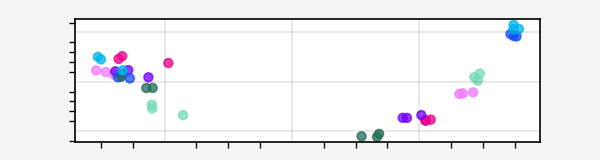

In [16]:
#PCA in Figure 1c
import matplotlib
x=components[:,0]
y=components[:,1]

fig, ax = plt.subplots(1, figsize=(3,0.8))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

donor = {'7':'#F17BFF', 'A':'#EC008C','B':'#7100FF','C':'#174EFF','D':'#236B59','E':'#00B6ED','F':'#76DCB6'}

c = full_data['gd_donor'].map(donor)

plt.scatter(x, y, s=10, alpha=0.75, c=c)

plt.show()

In [17]:
#Generation of heatmaps in Figure 1f
full_data = data_as_meta

In [18]:
full_data['Condition'] = full_data['Patient'] + '_' + full_data['Culture'] + '_' + full_data['gd_donor'] + '_' + full_data['Transduction'] + '_' + full_data['Treatment'] + '_' + full_data['Batch'] + '_' + full_data['Date'] + '_' + full_data['Replicate']

grouped = full_data.groupby(
    [
        "Condition"
    ]
, as_index=False).mean()

full_data.index = np.arange (full_data.shape[0])
condition_list = pd.unique(full_data['Condition'].tolist())
full_data.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Condition
0,0.0,1.820899,0.000000,0.000000,0.912053,4.943914,0.0,1.992162,3.845386,0.000000,2.987357,1.389871,1.775579,1.779619,0.183010,2.163294,0.309913,0.413701,1.580605,0.400898,4.875154,1.918200,0.155242,0.171000,1.198081,2.038532,0.370697,0.874354,0.691978,4.349185,2.780359,0.302230,1.059091,0.000000,0.415194,1.117354,0.049169,0.323541,2.747103,0.713999,0.015504,1.099381,0.000000,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A
1,0.0,1.439917,0.375318,0.000000,0.661397,0.277220,0.0,1.830135,4.346554,1.209086,0.000000,0.000000,1.414635,1.848197,1.048731,1.644816,0.183187,0.000000,0.000000,0.593048,4.238625,0.000000,0.286153,0.349314,0.000000,0.471109,0.624605,0.000000,0.771514,4.483969,3.289133,0.589678,0.000000,0.911677,0.035686,1.270355,0.000000,0.000000,0.853218,1.501938,0.935356,0.000000,0.000000,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A
2,0.0,1.726166,0.191168,1.195005,1.349553,0.000000,0.0,0.890059,5.035138,1.721534,1.926711,1.978225,1.800610,3.003231,0.000000,3.072524,0.000000,1.628247,1.483692,3.418171,6.191616,1.961778,0.194613,2.515089,1.219266,2.608889,0.000000,1.072362,2.073235,4.657668,3.322077,0.000000,1.139864,0.000000,2.171588,2.241691,0.000000,0.413431,3.082085,0.586349,0.976714,2.194020,0.000000,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A
3,0.0,2.145203,0.628499,0.000000,0.000000,0.000000,0.0,2.152886,3.375960,0.000000,0.621580,0.995887,1.271505,1.214568,0.000000,2.697308,0.000000,0.276302,1.590745,0.000000,4.732034,2.156342,0.000000,0.000000,0.000000,1.797991,0.000000,0.803190,0.281159,3.773497,2.167592,0.000000,0.318134,0.239812,0.000000,0.555265,0.000000,0.000000,3.115308,0.044860,1.508892,0.000000,0.000000,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A
4,0.0,2.475196,0.000000,0.000000,0.983286,0.420517,0.0,1.748739,4.738645,1.508852,1.185841,2.364109,1.992167,2.518656,0.835443,2.626751,1.259103,1.792090,2.109745,1.976145,5.782207,2.662962,0.084563,2.385082,1.670220,2.136458,0.000000,1.274603,0.998321,5.125244,3.542326,0.245344,2.114941,0.000000,0.000000,1.773193,1.664352,0.479816,2.612459,1.155034,1.012279,0.769491,0.593427,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A


In [19]:
#Define control for pairwise EMD
full_data["Control"] =  "X_gd_" + full_data["gd_donor"] + '_NT_' +  full_data["Treatment"] + '_Batch3_' + full_data['Date']


In [20]:
full_data.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Condition,Control
0,0.0,1.820899,0.000000,0.000000,0.912053,4.943914,0.0,1.992162,3.845386,0.000000,2.987357,1.389871,1.775579,1.779619,0.183010,2.163294,0.309913,0.413701,1.580605,0.400898,4.875154,1.918200,0.155242,0.171000,1.198081,2.038532,0.370697,0.874354,0.691978,4.349185,2.780359,0.302230,1.059091,0.000000,0.415194,1.117354,0.049169,0.323541,2.747103,0.713999,0.015504,1.099381,0.000000,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A,X_gd_7_NT_BM_Batch3_20220614
1,0.0,1.439917,0.375318,0.000000,0.661397,0.277220,0.0,1.830135,4.346554,1.209086,0.000000,0.000000,1.414635,1.848197,1.048731,1.644816,0.183187,0.000000,0.000000,0.593048,4.238625,0.000000,0.286153,0.349314,0.000000,0.471109,0.624605,0.000000,0.771514,4.483969,3.289133,0.589678,0.000000,0.911677,0.035686,1.270355,0.000000,0.000000,0.853218,1.501938,0.935356,0.000000,0.000000,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A,X_gd_7_NT_BM_Batch3_20220614
2,0.0,1.726166,0.191168,1.195005,1.349553,0.000000,0.0,0.890059,5.035138,1.721534,1.926711,1.978225,1.800610,3.003231,0.000000,3.072524,0.000000,1.628247,1.483692,3.418171,6.191616,1.961778,0.194613,2.515089,1.219266,2.608889,0.000000,1.072362,2.073235,4.657668,3.322077,0.000000,1.139864,0.000000,2.171588,2.241691,0.000000,0.413431,3.082085,0.586349,0.976714,2.194020,0.000000,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A,X_gd_7_NT_BM_Batch3_20220614
3,0.0,2.145203,0.628499,0.000000,0.000000,0.000000,0.0,2.152886,3.375960,0.000000,0.621580,0.995887,1.271505,1.214568,0.000000,2.697308,0.000000,0.276302,1.590745,0.000000,4.732034,2.156342,0.000000,0.000000,0.000000,1.797991,0.000000,0.803190,0.281159,3.773497,2.167592,0.000000,0.318134,0.239812,0.000000,0.555265,0.000000,0.000000,3.115308,0.044860,1.508892,0.000000,0.000000,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A,X_gd_7_NT_BM_Batch3_20220614
4,0.0,2.475196,0.000000,0.000000,0.983286,0.420517,0.0,1.748739,4.738645,1.508852,1.185841,2.364109,1.992167,2.518656,0.835443,2.626751,1.259103,1.792090,2.109745,1.976145,5.782207,2.662962,0.084563,2.385082,1.670220,2.136458,0.000000,1.274603,0.998321,5.125244,3.542326,0.245344,2.114941,0.000000,0.000000,1.773193,1.664352,0.479816,2.612459,1.155034,1.012279,0.769491,0.593427,20220614,X,gd,7,eGFP-stIL15,BM,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A,X_gd_7_NT_BM_Batch3_20220614


In [21]:
stIL15 = full_data.loc[(full_data['Transduction'].isin(['eGFP-stIL15']))]
NT = full_data.loc[(full_data['Transduction'].isin(['NT']))]

In [22]:
no_metadata = full_data.drop(
['Date',
 'Patient',
 'Culture',
 'gd_donor',
 'Transduction',
 'Treatment',
 'Replicate',
 'Time',
 'Batch',
 'Cell_type',
 'Control',
'Condition',
], axis=1, inplace=False)

no_metadata_stIL15 = stIL15.drop(
['Date',
 'Patient',
 'Culture',
 'gd_donor',
 'Transduction',
 'Treatment',
 'Replicate',
 'Time',
 'Batch',
 'Cell_type',
 'Control',
'Condition',
], axis=1, inplace=False)

no_metadata_NT = NT.drop(
['Date',
 'Patient',
 'Culture',
 'gd_donor',
 'Transduction',
 'Treatment',
 'Replicate',
 'Time',
 'Batch',
 'Cell_type',
 'Control',
'Condition',
], axis=1, inplace=False)

In [23]:
marker_list = list(no_metadata.columns.values)

In [24]:
condition_list

array(['X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A',
       'X_gd_7_eGFP-stIL15_BM_Batch2_20220614_B',
       'X_gd_7_eGFP-stIL15_BM_Batch2_20220614_C',
       'X_gd_7_NT_BM_Batch3_20220614_A', 'X_gd_7_NT_BM_Batch3_20220614_B',
       'X_gd_7_NT_BM_Batch3_20220614_C',
       'X_gd_A_eGFP-stIL15_BM_Batch2_20220614_A',
       'X_gd_A_eGFP-stIL15_BM_Batch2_20220614_B',
       'X_gd_A_eGFP-stIL15_BM_Batch2_20220614_C',
       'X_gd_A_NT_BM_Batch3_20220614_A', 'X_gd_A_NT_BM_Batch3_20220614_B',
       'X_gd_A_NT_BM_Batch3_20220614_C',
       'X_gd_B_eGFP-stIL15_BM_Batch2_20220614_A',
       'X_gd_B_eGFP-stIL15_BM_Batch2_20220614_B',
       'X_gd_B_eGFP-stIL15_BM_Batch2_20220614_C',
       'X_gd_B_NT_BM_Batch3_20220614_A', 'X_gd_B_NT_BM_Batch3_20220614_B',
       'X_gd_B_NT_BM_Batch3_20220614_C',
       'X_gd_C_eGFP-stIL15_BM_Batch2_20220614_A',
       'X_gd_C_eGFP-stIL15_BM_Batch2_20220614_B',
       'X_gd_C_eGFP-stIL15_BM_Batch2_20220614_C',
       'X_gd_C_NT_BM_Batch3_20220614_A', 'X_gd_C_NT_

In [38]:
NT_emd = pd.DataFrame(
    np.full((len(condition_list), len(marker_list)), np.nan),
    columns=marker_list,
    index=condition_list)

Tr_emd = pd.DataFrame(
    np.full((len(condition_list), len(marker_list)), np.nan),
    columns=marker_list,
    index=condition_list)

In [39]:
control_list = pd.unique(full_data['Control'].tolist())

In [40]:
#Calculating stIL15 EMDs relative to NT
for condition in condition_list:
    each_line = full_data.loc[(full_data["Condition"] == condition)]
    for marker in marker_list:
                    sign = np.sign(each_line[marker].median() - no_metadata_NT[marker].median())
                    if sign == 0:
                        sign = np.sign(each_line[marker].mean() - no_metadata_NT[marker].mean())
                    signed_emd = sign*scprep.stats.EMD(
                        each_line[marker], no_metadata_NT[marker]
            )
                    NT_emd.loc[condition, marker] = signed_emd

assert not NT_emd.isna().values.any()

In [41]:
#Calculating NT EMDs relative to stIL15
for condition in condition_list:
    each_line = full_data.loc[(full_data["Condition"] == condition)]
    for marker in marker_list:
                    sign = np.sign(each_line[marker].median() - no_metadata_stIL15[marker].median())
                    if sign == 0:
                        sign = np.sign(each_line[marker].mean() - no_metadata_stIL15[marker].mean())
                    signed_emd = sign*scprep.stats.EMD(
                        each_line[marker], no_metadata_stIL15[marker]
            )
                    Tr_emd.loc[condition, marker] = signed_emd

assert not Tr_emd.isna().values.any()

In [55]:
Tr_EMD_final = NT_emd.loc[~NT_emd.index.str.contains('NT', case=False, regex=True)]
NT_EMD_final = Tr_emd.loc[~Tr_emd.index.str.contains('eGFP-stIL15', case=False, regex=True)]

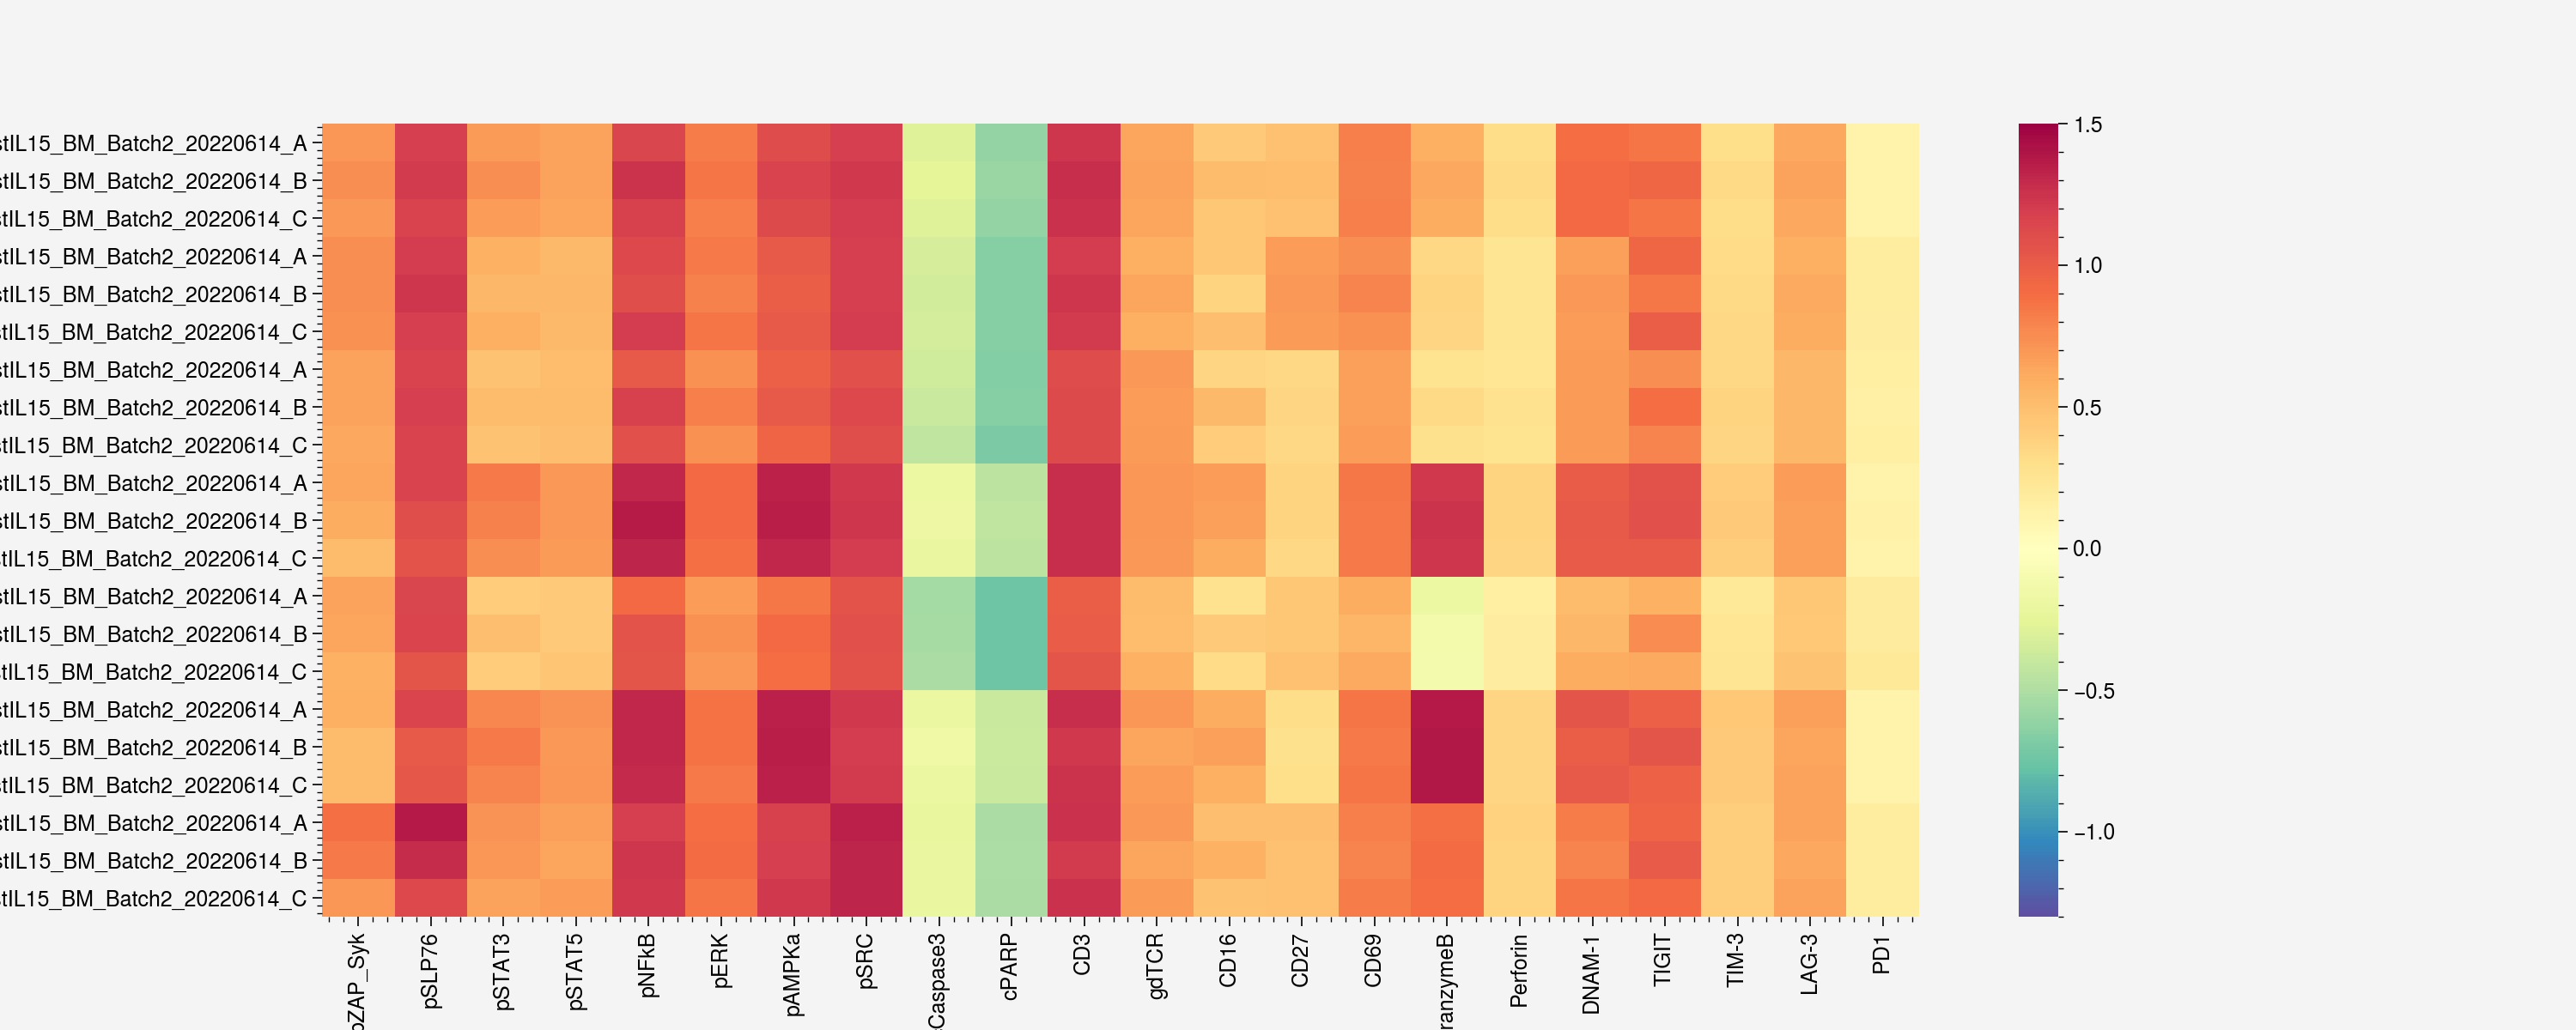

In [59]:
#stIL15gd heatmap relative to NT gd
EMD_heatmap_Tr = Tr_EMD_final.filter(['pZAP_Syk','pSLP76','pSTAT3','pSTAT5','pNFkB','pERK','pAMPKa','pSRC','cCaspase3','cPARP','CD3','gdTCR','CD16','CD27','CD69','GranzymeB','Perforin','DNAM-1','TIGIT','TIM-3','LAG-3','PD1'])

fig, ax = plt.subplots(figsize=(15, 6))
colormap=pplt.Colormap('Spectral_r')
offset = mcolors.TwoSlopeNorm(vcenter=-0,vmin=-1.3,vmax=1.5)
seaborn.heatmap(EMD_heatmap_Tr, cmap=colormap,norm=offset)

plt.show()

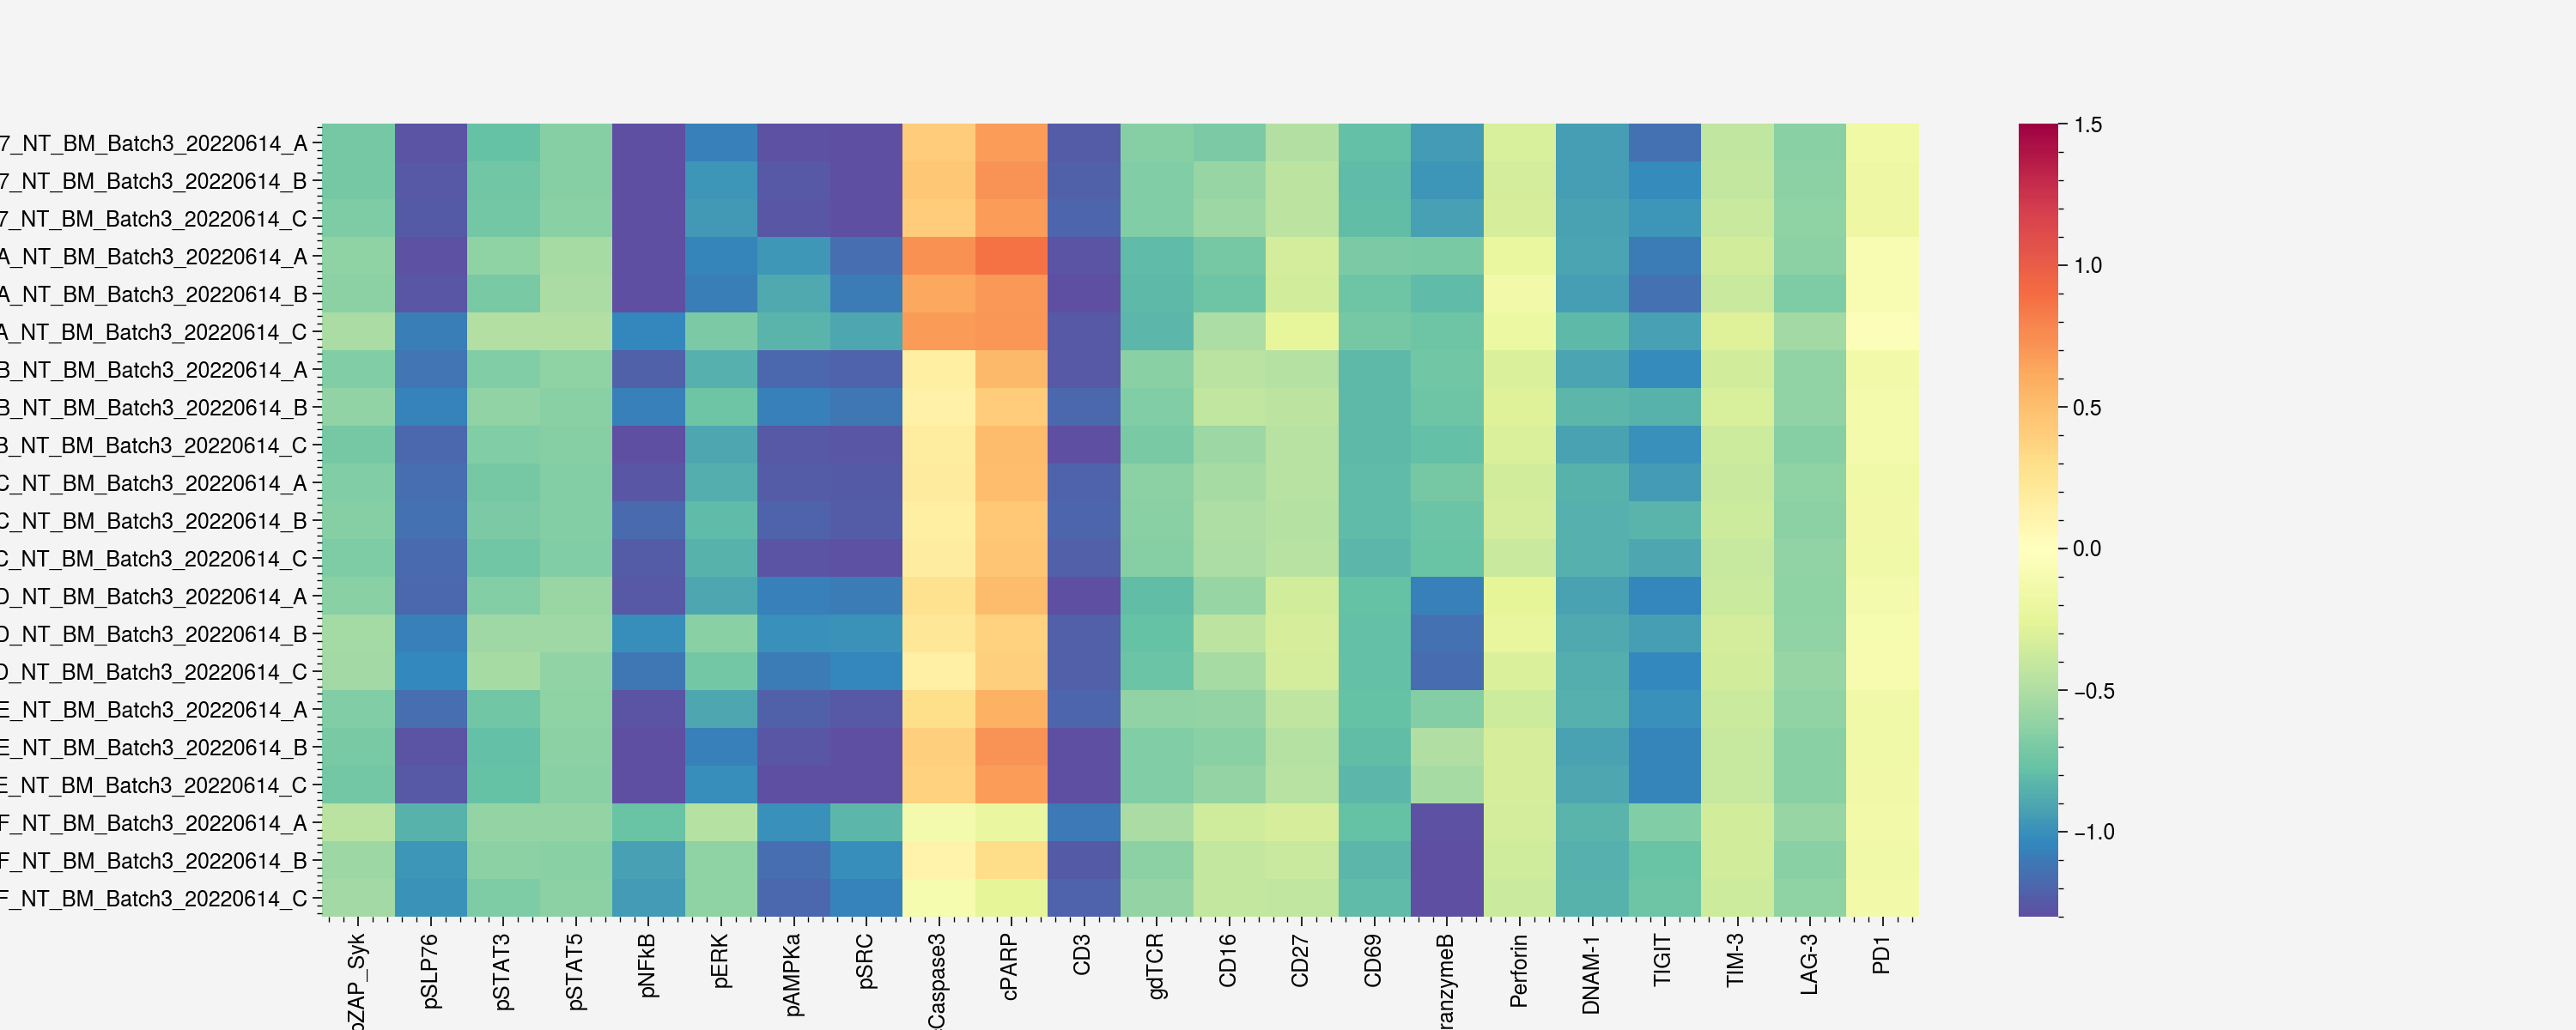

In [60]:
#NT gd heatmap relative to stIL15 gd
EMD_heatmap_NT = NT_EMD_final.filter(['pZAP_Syk','pSLP76','pSTAT3','pSTAT5','pNFkB','pERK','pAMPKa','pSRC','cCaspase3','cPARP','CD3','gdTCR','CD16','CD27','CD69','GranzymeB','Perforin','DNAM-1','TIGIT','TIM-3','LAG-3','PD1'])

fig, ax = plt.subplots(figsize=(15, 6))
colormap=pplt.Colormap('Spectral_r')
offset = mcolors.TwoSlopeNorm(vcenter=-0,vmin=-1.3,vmax=1.5)
seaborn.heatmap(EMD_heatmap_NT, cmap=colormap,norm=offset)

plt.show()

In [61]:
#Generation of single cell PHATE density plots in Figure 1c
full_data_condition = full_data.drop(
['Date',
 'Patient',
 'Culture',
 'gd_donor',
 'Transduction',
 'Treatment',
 'Replicate',
 'Time',
 'Batch',
 'Cell_type',
], axis=1, inplace=False)
full_data_condition.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Condition,Control
0,0.0,1.820899,0.000000,0.000000,0.912053,4.943914,0.0,1.992162,3.845386,0.000000,2.987357,1.389871,1.775579,1.779619,0.183010,2.163294,0.309913,0.413701,1.580605,0.400898,4.875154,1.918200,0.155242,0.171000,1.198081,2.038532,0.370697,0.874354,0.691978,4.349185,2.780359,0.302230,1.059091,0.000000,0.415194,1.117354,0.049169,0.323541,2.747103,0.713999,0.015504,1.099381,0.000000,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A,X_gd_7_NT_BM_Batch3_20220614
1,0.0,1.439917,0.375318,0.000000,0.661397,0.277220,0.0,1.830135,4.346554,1.209086,0.000000,0.000000,1.414635,1.848197,1.048731,1.644816,0.183187,0.000000,0.000000,0.593048,4.238625,0.000000,0.286153,0.349314,0.000000,0.471109,0.624605,0.000000,0.771514,4.483969,3.289133,0.589678,0.000000,0.911677,0.035686,1.270355,0.000000,0.000000,0.853218,1.501938,0.935356,0.000000,0.000000,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A,X_gd_7_NT_BM_Batch3_20220614
2,0.0,1.726166,0.191168,1.195005,1.349553,0.000000,0.0,0.890059,5.035138,1.721534,1.926711,1.978225,1.800610,3.003231,0.000000,3.072524,0.000000,1.628247,1.483692,3.418171,6.191616,1.961778,0.194613,2.515089,1.219266,2.608889,0.000000,1.072362,2.073235,4.657668,3.322077,0.000000,1.139864,0.000000,2.171588,2.241691,0.000000,0.413431,3.082085,0.586349,0.976714,2.194020,0.000000,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A,X_gd_7_NT_BM_Batch3_20220614
3,0.0,2.145203,0.628499,0.000000,0.000000,0.000000,0.0,2.152886,3.375960,0.000000,0.621580,0.995887,1.271505,1.214568,0.000000,2.697308,0.000000,0.276302,1.590745,0.000000,4.732034,2.156342,0.000000,0.000000,0.000000,1.797991,0.000000,0.803190,0.281159,3.773497,2.167592,0.000000,0.318134,0.239812,0.000000,0.555265,0.000000,0.000000,3.115308,0.044860,1.508892,0.000000,0.000000,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A,X_gd_7_NT_BM_Batch3_20220614
4,0.0,2.475196,0.000000,0.000000,0.983286,0.420517,0.0,1.748739,4.738645,1.508852,1.185841,2.364109,1.992167,2.518656,0.835443,2.626751,1.259103,1.792090,2.109745,1.976145,5.782207,2.662962,0.084563,2.385082,1.670220,2.136458,0.000000,1.274603,0.998321,5.125244,3.542326,0.245344,2.114941,0.000000,0.000000,1.773193,1.664352,0.479816,2.612459,1.155034,1.012279,0.769491,0.593427,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A,X_gd_7_NT_BM_Batch3_20220614


In [62]:
downsampled_df = pd.DataFrame()
grouped = full_data_condition.groupby('Condition')
for _, group in grouped:
    sampled_group = group.sample(n=375, replace=True, random_state=13)
    downsampled_df = pd.concat([downsampled_df, sampled_group])

downsampled_df.reset_index(drop=True, inplace=True)
condition_mask_NT = downsampled_df['Condition'].str.contains('NT')
condition_mask_Tr = downsampled_df['Condition'].str.contains('eGFP-stIL15')

downsampled_NT = downsampled_df[condition_mask_NT]
downsampled_Tr = downsampled_df[condition_mask_Tr]



In [63]:
downsampled_df_meta = downsampled_df
downsampled_df_meta[['Patient', 'Culture','gd_donor', 'Transduction', 'Treatment','Batch','Date', 'Replicate']] = downsampled_df['Condition'].str.split('_', expand=True)

In [64]:
PHATE_data = downsampled_df.filter(['pRB','IdU','pHH3','CyclinB1','cCaspase3','cPARP'])
PHATE_data

,pRB,IdU,pHH3,CyclinB1,cCaspase3,cPARP
0,2.057124,1.035597,0.000000,0.602747,1.553544,0.804749
1,0.000000,0.022834,0.000000,0.084701,2.804754,2.246696
2,0.000000,0.162115,0.000000,0.119656,2.691680,1.543852
3,0.000000,0.000000,0.000000,0.132175,2.358631,1.393041
4,1.458235,0.094925,0.252090,0.348735,2.685031,0.000000
...,...,...,...,...,...,...
15745,2.149213,0.126814,0.000000,1.393972,1.879997,1.636400
15746,2.998369,4.726760,0.000000,1.097939,1.574731,0.613359
15747,3.636529,5.785701,0.835954,2.664862,2.858239,0.944918
15748,3.394955,4.901049,0.381840,1.139084,1.979984,0.084177


Calculating PHATE...
  Running PHATE on 15750 observations and 6 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 1.15 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 1.23 seconds.
  Calculating landmark operator...
    Calculating SVD...


/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 3310 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/graphtools/graphs.py:454: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


    Calculated SVD in 0.66 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.76 seconds.
  Calculated landmark operator in 5.41 seconds.
  Calculating optimal t...
    Automatically selected t = 47
  Calculated optimal t in 1.68 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.43 seconds.
  Calculating metric MDS...


/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 12.53 seconds.
Calculated PHATE in 21.29 seconds.


/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:title={'center':'PDO'}, xlabel='PHATE1', ylabel='PHATE2'>

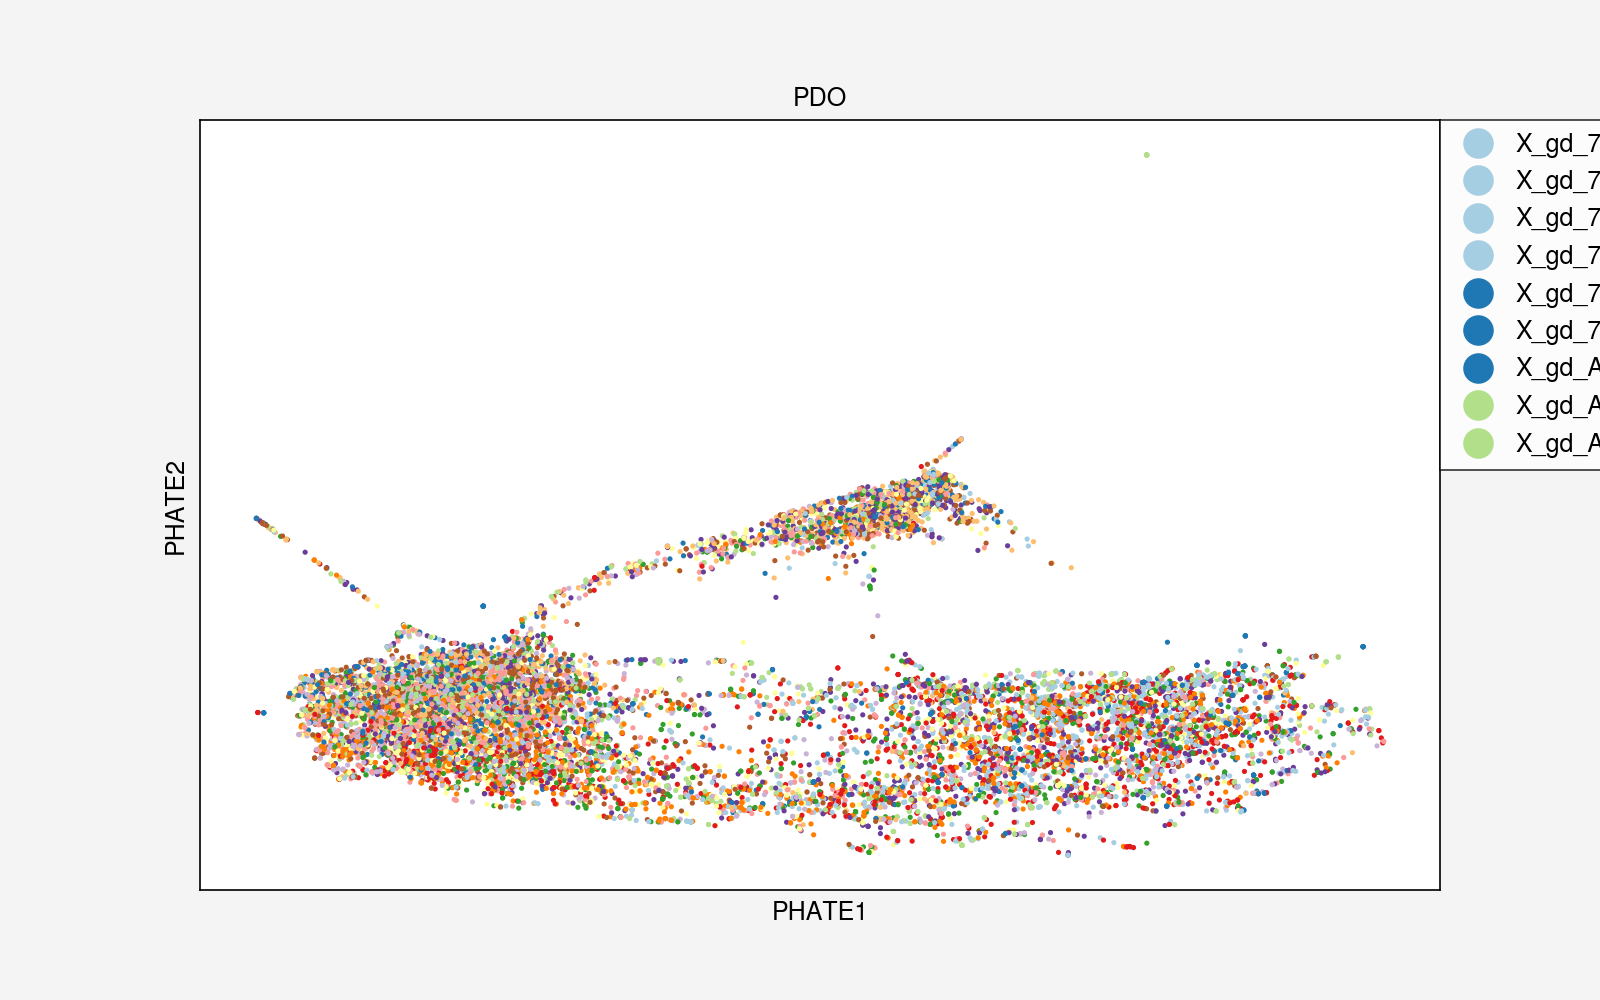

In [65]:
phate_op = phate.PHATE(knn=5,random_state=13, mds_solver="smacof", verbose=True)

data_phate = phate_op.fit_transform(PHATE_data)
data_phate = pd.DataFrame(data_phate, index=PHATE_data.index)


scprep.plot.scatter2d(data_phate, c=downsampled_df['Condition'], cmap='Paired',
                      ticks=False, label_prefix='PHATE',
                      legend_anchor=(1,1), figsize=(8,5), title='PDO')

/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:title={'center':'PDO'}, xlabel='PHATE1', ylabel='PHATE2'>

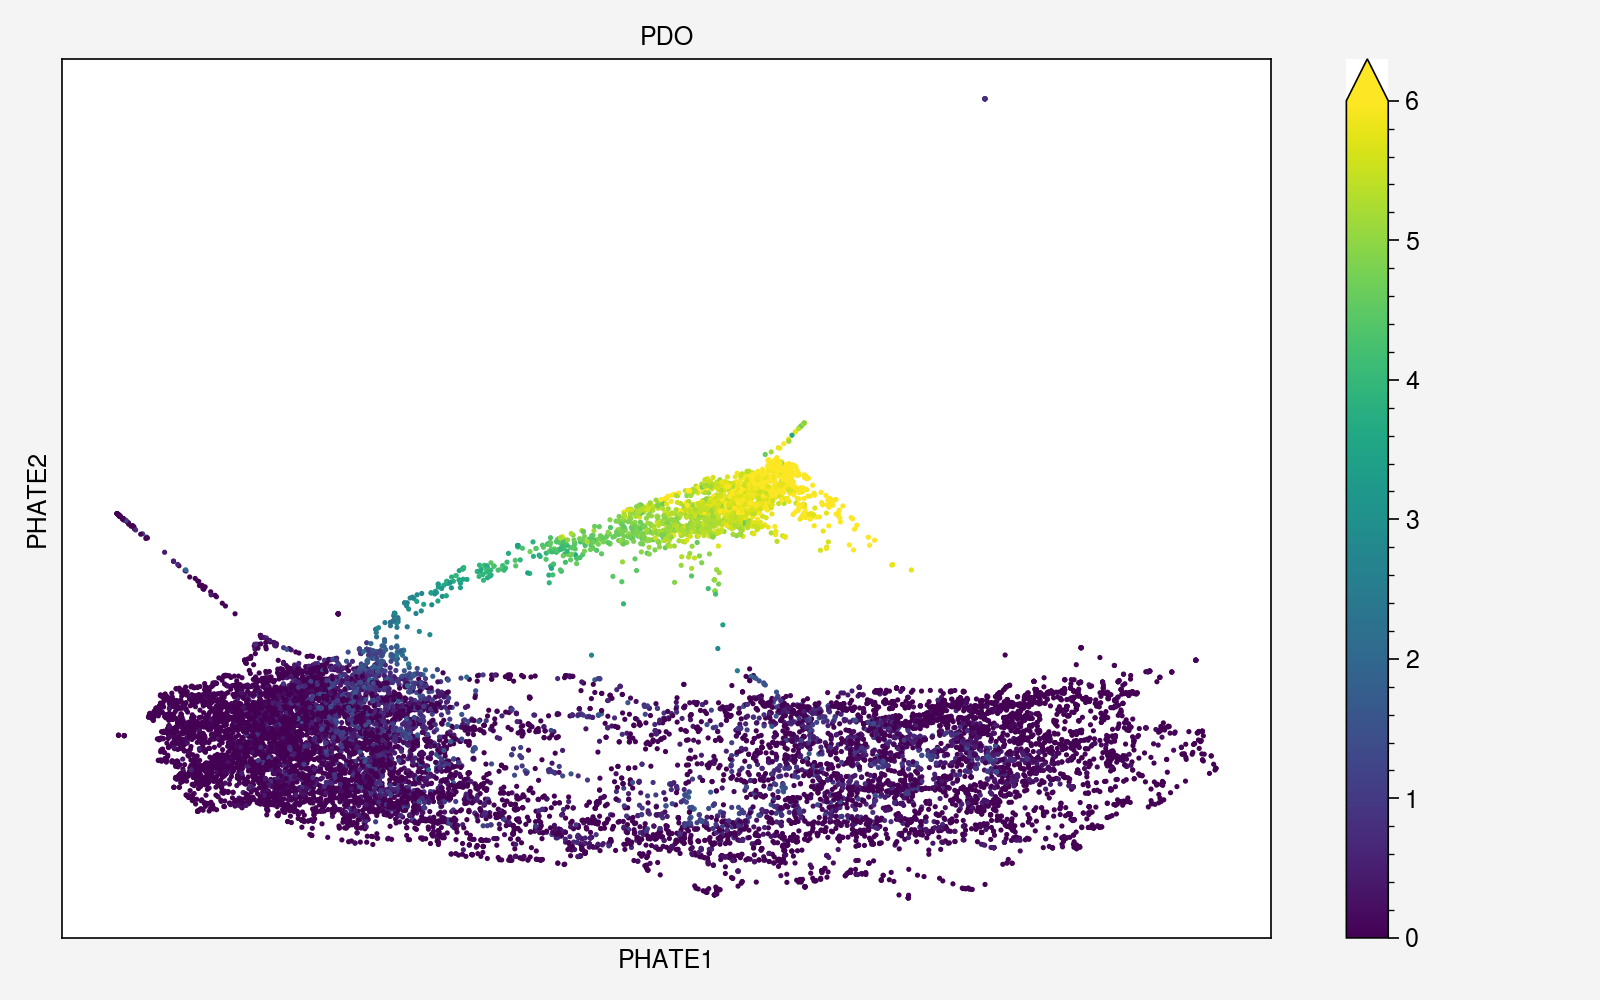

In [66]:
#S-Phase
scprep.plot.scatter2d(data_phate, c=downsampled_df['IdU'], cmap='viridis', vmax=6,
                      ticks=False, label_prefix='PHATE',
                      legend_anchor=(1,1), figsize=(8,5), title='PDO')

/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:title={'center':'PDO'}, xlabel='PHATE1', ylabel='PHATE2'>

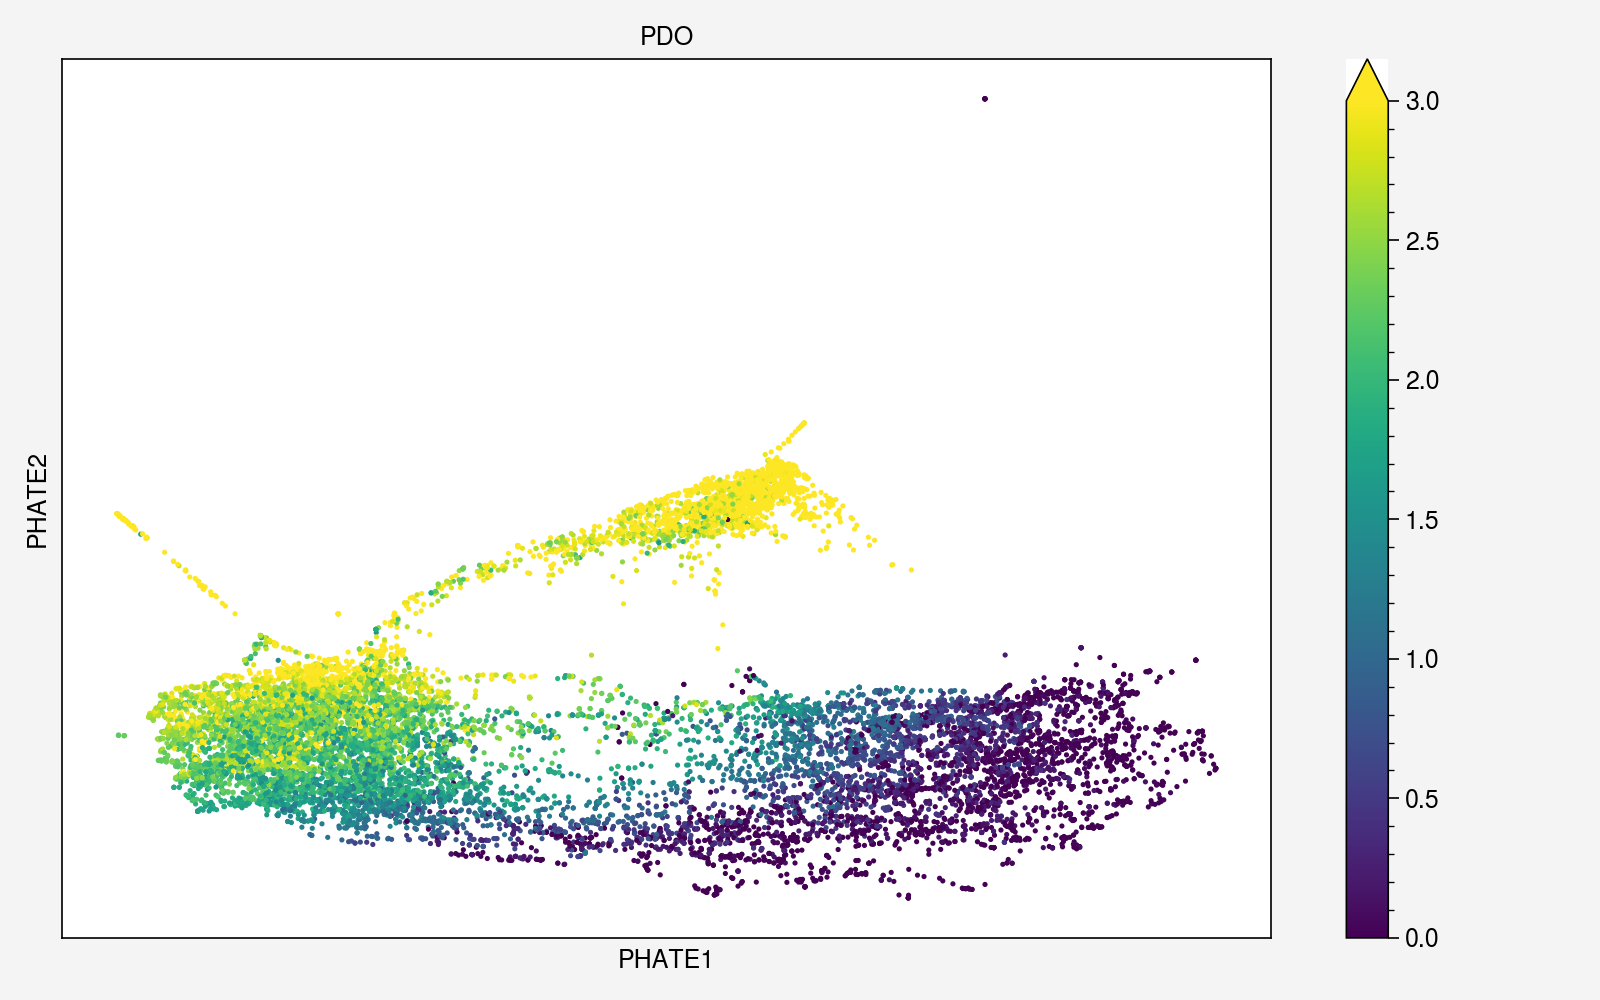

In [67]:
#Proliferating
scprep.plot.scatter2d(data_phate, c=downsampled_df['pRB'], cmap='viridis',vmax=3,
                      ticks=False, label_prefix='PHATE',
                      legend_anchor=(1,1), figsize=(8,5), title='PDO')

/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:title={'center':'PDO'}, xlabel='PHATE1', ylabel='PHATE2'>

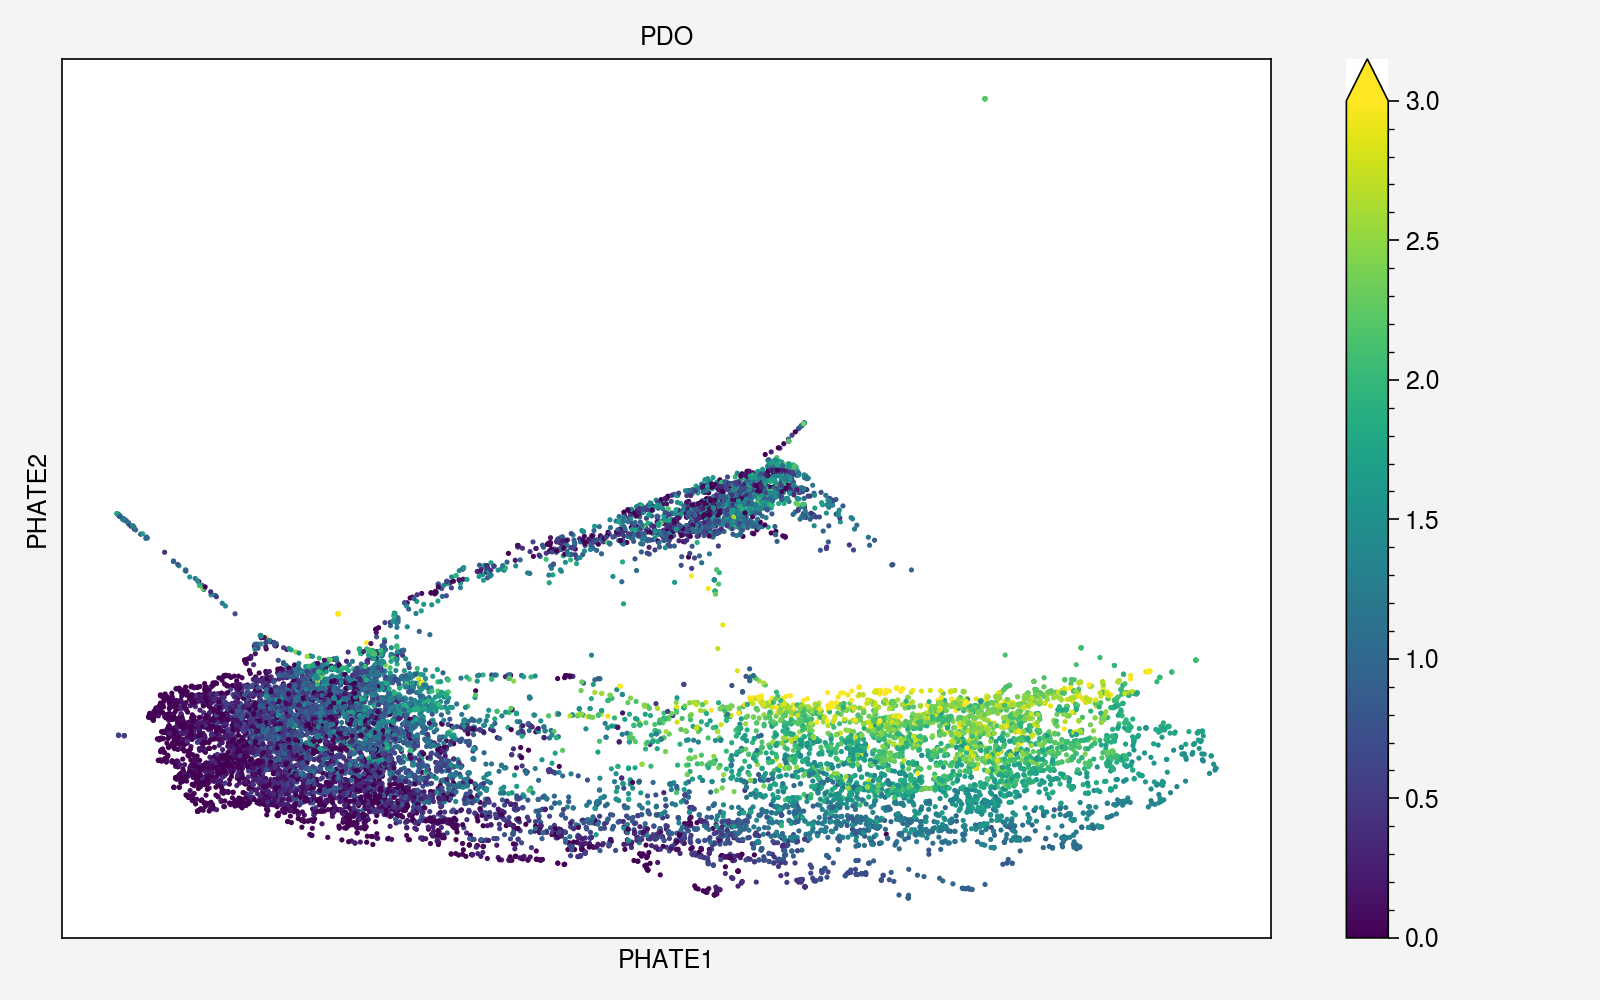

In [68]:
#Apoptotic
scprep.plot.scatter2d(data_phate, c=downsampled_df['cPARP'], cmap='viridis', vmax=3,
                      ticks=False, label_prefix='PHATE',
                      legend_anchor=(1,1), figsize=(8,5), title='PDO')

/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:title={'center':'PDO'}, xlabel='PHATE1', ylabel='PHATE2'>

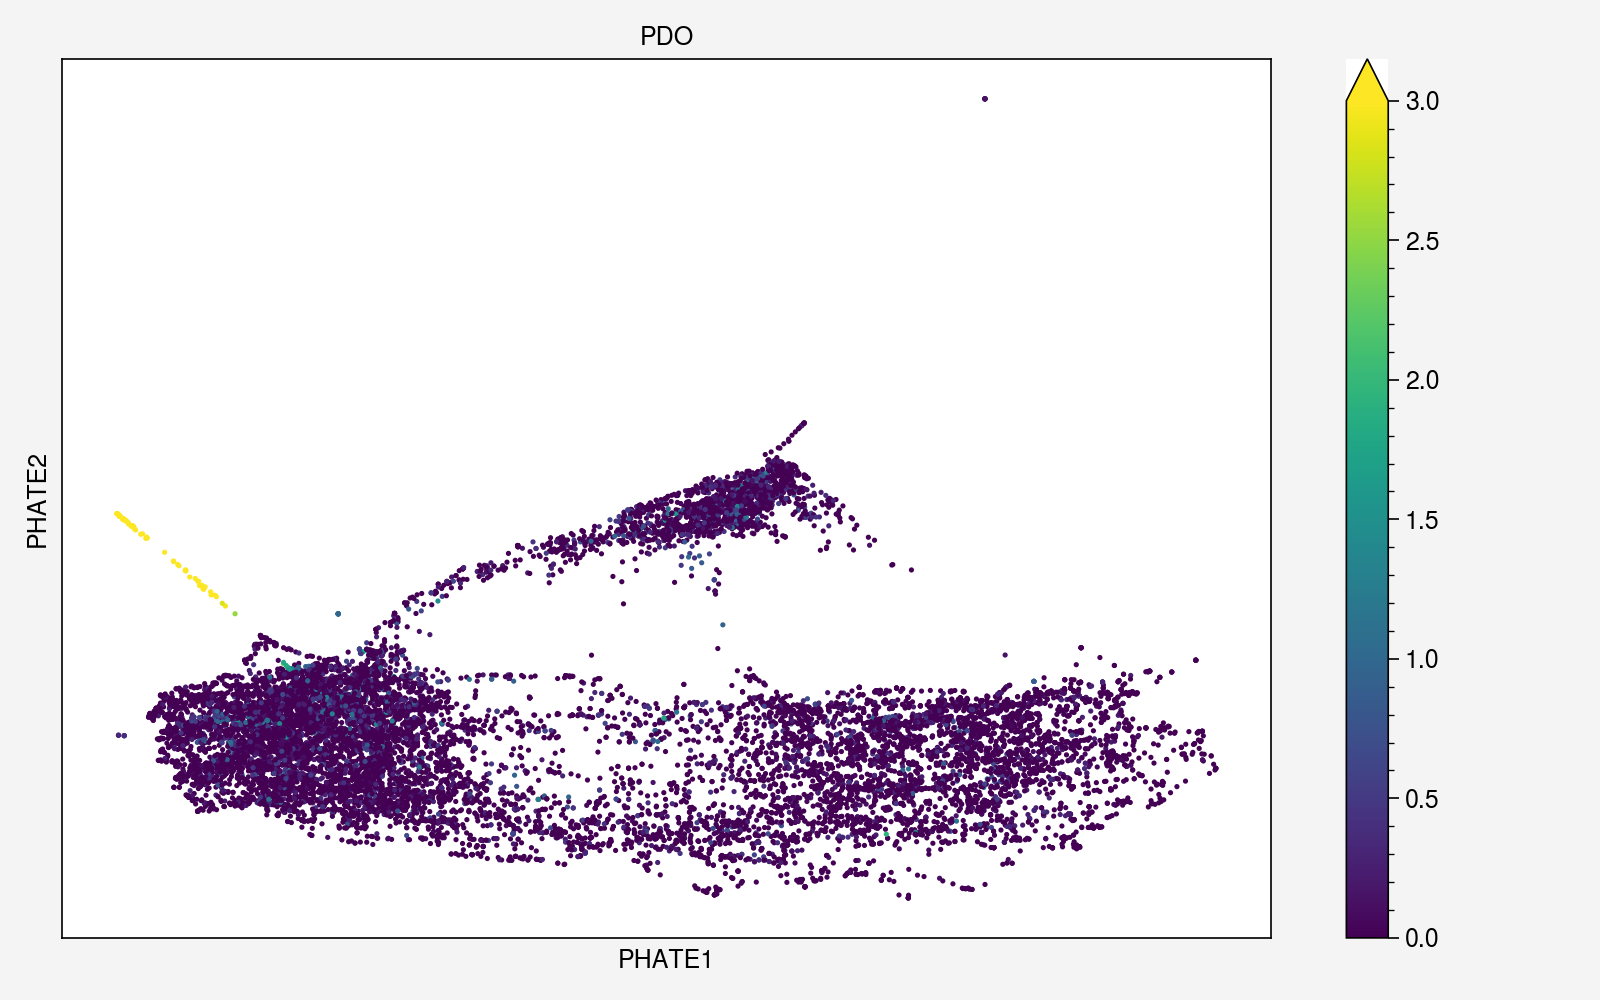

In [69]:
#M-phase
scprep.plot.scatter2d(data_phate, c=downsampled_df['pHH3'], cmap='viridis', vmax=3,
                      ticks=False, label_prefix='PHATE',
                      legend_anchor=(1,1), figsize=(8,5), title='PDO')

In [70]:
data_phate['Condition'] = downsampled_df['Condition']
data_phate

,0,1,Condition
0,-0.010537,0.000495,X_gd_7_NT_BM_Batch3_20220614_A
1,0.023826,0.006162,X_gd_7_NT_BM_Batch3_20220614_A
2,0.030437,-0.001984,X_gd_7_NT_BM_Batch3_20220614_A
3,0.028875,-0.010878,X_gd_7_NT_BM_Batch3_20220614_A
4,-0.007735,-0.008689,X_gd_7_NT_BM_Batch3_20220614_A
...,...,...,...
15745,-0.011583,0.002679,X_gd_F_eGFP-stIL15_BM_Batch2_20220614_C
15746,0.000879,0.030703,X_gd_F_eGFP-stIL15_BM_Batch2_20220614_C
15747,0.007453,0.039160,X_gd_F_eGFP-stIL15_BM_Batch2_20220614_C
15748,0.002988,0.031187,X_gd_F_eGFP-stIL15_BM_Batch2_20220614_C


In [71]:
data_phate_NT = data_phate.loc[(data_phate['Condition'].str.contains('NT'))]
data_phate_Tr = data_phate[(data_phate['Condition'].str.contains('eGFP-stIL15'))]
data_phate_Tr[['Patient', 'Culture','gd_donor', 'Transduction', 'Treatment','Batch','Date', 'Replicate']] = data_phate_Tr['Condition'].str.split('_', expand=True)
data_phate_NT[['Patient', 'Culture','gd_donor', 'Transduction', 'Treatment','Batch','Date', 'Replicate']] = data_phate_NT['Condition'].str.split('_', expand=True)


/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


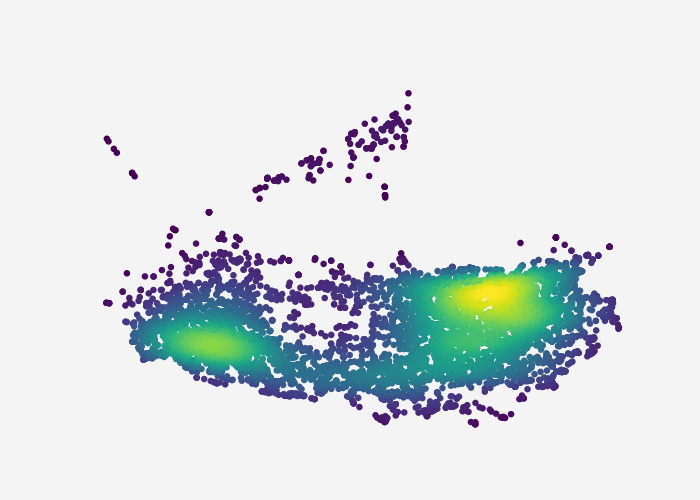

In [72]:
#NT gd Density Plot
from scipy.stats import gaussian_kde
import seaborn as sns

data = data_phate_NT


x_mono = data.iloc[:,0]
y_mono = data.iloc[:,1]
x_mono_c_array = x_mono.to_numpy()
y_mono_c_array = y_mono.to_numpy()

xy = np.vstack([x_mono_c_array,y_mono_c_array])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x_mono_c_array[idx], y_mono_c_array[idx], z[idx]


fig, ax = plt.subplots(figsize=(3.5,2.5))
cmap = sns.color_palette("viridis", as_cmap=True)
ax.scatter(x, y, c=z, s=3, cmap=cmap)
plt.ylim(-0.03, 0.05)
plt.xlim(-0.03, 0.035)
plt.axis('off')
plt.show()

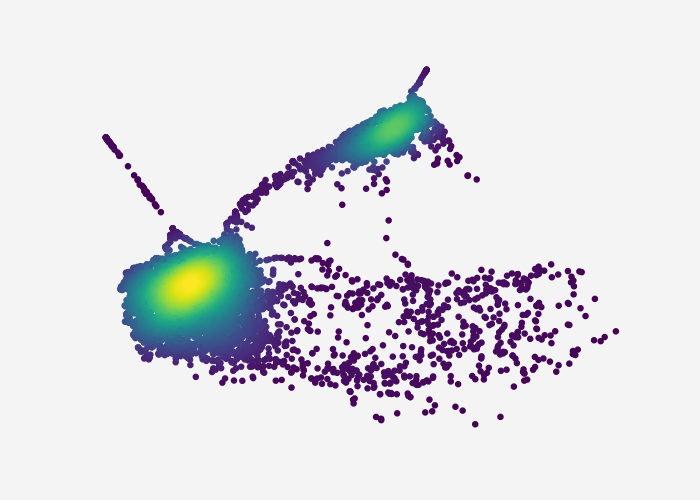

In [73]:
#stIL15 gd Density Plot
from scipy.stats import gaussian_kde
import seaborn as sns

data = data_phate_Tr


x_mono = data.iloc[:,0]
y_mono = data.iloc[:,1]
x_mono_c_array = x_mono.to_numpy()
y_mono_c_array = y_mono.to_numpy()

xy = np.vstack([x_mono_c_array,y_mono_c_array])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x_mono_c_array[idx], y_mono_c_array[idx], z[idx]


fig, ax = plt.subplots(figsize=(3.5,2.5))
cmap = sns.color_palette("viridis", as_cmap=True)
ax.scatter(x, y, c=z, s=3, cmap=cmap)
plt.ylim(-0.03, 0.05)
plt.xlim(-0.03, 0.035)
plt.axis('off')
plt.show()

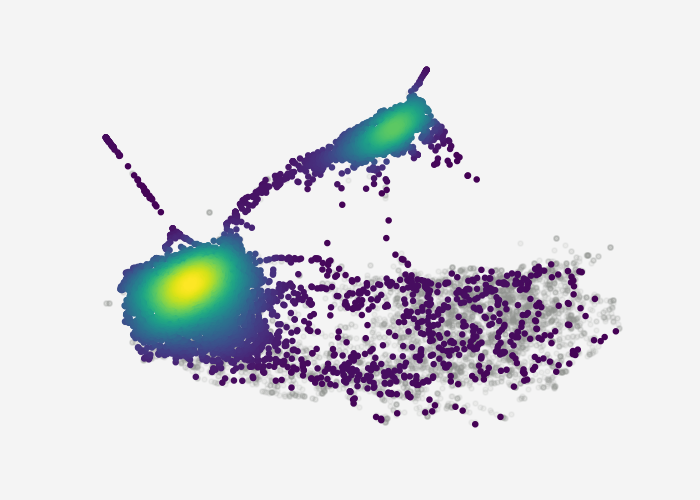

In [74]:
#stIL15 gd overlay on grey NT
dataNT = data_phate_NT
dataTr = data_phate_Tr

x1 = dataNT.iloc[:,0].to_numpy()
y1 = dataNT.iloc[:,1].to_numpy()
x2 = dataTr.iloc[:,0].to_numpy()
y2 = dataTr.iloc[:,1].to_numpy()

xy1 = np.vstack([x1, y1])
z1 = gaussian_kde(xy1)(xy1)
xy2 = np.vstack([x2, y2])
z2 = gaussian_kde(xy2)(xy2)

idx1 = z1.argsort()
x1, y1, z1 = x1[idx1], y1[idx1], z1[idx1]
idx2 = z2.argsort()
x2, y2, z2 = x2[idx2], y2[idx2], z2[idx2]

fig, ax = plt.subplots(figsize=(3.5, 2.5))
cmap = sns.color_palette("viridis", as_cmap=True)

ax.scatter(x1, y1, c='grey', s=3, cmap=cmap, alpha=0.1)

ax.scatter(x2, y2, c=z2, s=3, cmap=cmap, alpha=1)

plt.ylim(-0.03, 0.05)
plt.xlim(-0.03, 0.035)
plt.axis('off')

plt.show()


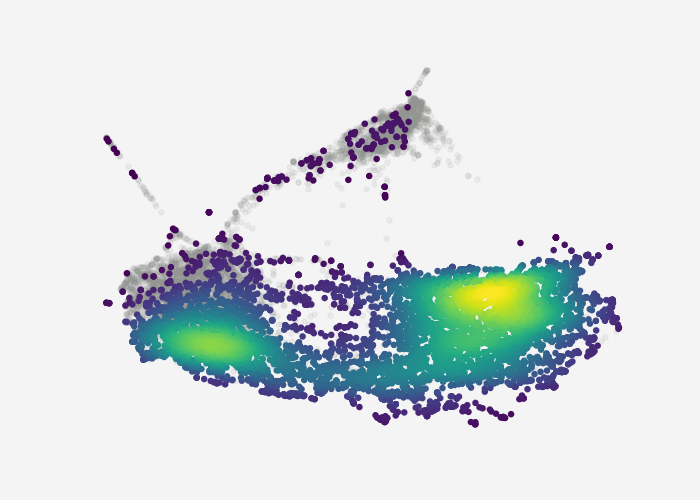

In [75]:
#NT gd overlay on grey stIL15 gd
dataNT = data_phate_NT
dataTr = data_phate_Tr

x1 = dataNT.iloc[:,0].to_numpy()
y1 = dataNT.iloc[:,1].to_numpy()
x2 = dataTr.iloc[:,0].to_numpy()
y2 = dataTr.iloc[:,1].to_numpy()

xy1 = np.vstack([x1, y1])
z1 = gaussian_kde(xy1)(xy1)
xy2 = np.vstack([x2, y2])
z2 = gaussian_kde(xy2)(xy2)

idx1 = z1.argsort()
x1, y1, z1 = x1[idx1], y1[idx1], z1[idx1]
idx2 = z2.argsort()
x2, y2, z2 = x2[idx2], y2[idx2], z2[idx2]

fig, ax = plt.subplots(figsize=(3.5, 2.5))
cmap = sns.color_palette("viridis", as_cmap=True)

ax.scatter(x2, y2, c='grey', s=3, cmap=cmap, alpha=0.1)

ax.scatter(x1, y1, c=z1, s=3, cmap=cmap, alpha=1)

plt.ylim(-0.03, 0.05)
plt.xlim(-0.03, 0.035)
plt.axis('off')

plt.show()
